In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
titanic = sns.load_dataset("titanic")
titanic.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [2]:
df = titanic[['pclass','age','sibsp','parch','fare','sex','embarked','survived']].copy()

# Drop rows with missing target
df = df[df['survived'].notna()].reset_index(drop=True)


In [3]:
df['age'].fillna(df['age'].median(), inplace=True)
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)


In [4]:
df = pd.get_dummies(df, columns=['sex','embarked'], drop_first=True)
df.head()


,pclass,age,sibsp,parch,fare,survived,sex_male,embarked_Q,embarked_S
0,3,22.0,1,0,7.2500,0,True,False,True
1,1,38.0,1,0,71.2833,1,False,False,False
2,3,26.0,0,0,7.9250,1,False,False,True
3,1,35.0,1,0,53.1000,1,False,False,True
4,3,35.0,0,0,8.0500,0,True,False,True


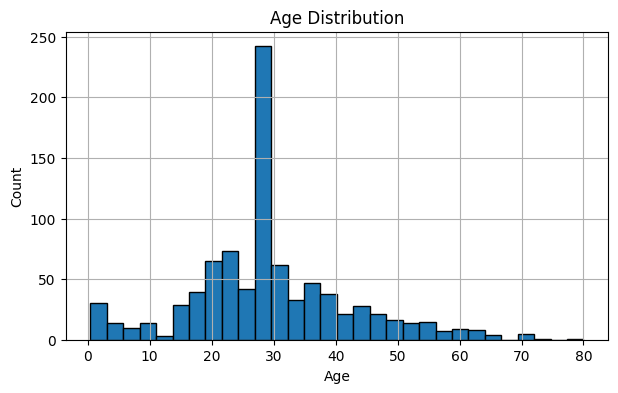

In [13]:
plt.figure(figsize=(7,4))
plt.hist(df['age'], bins=30, edgecolor='black')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.grid()
plt.show()


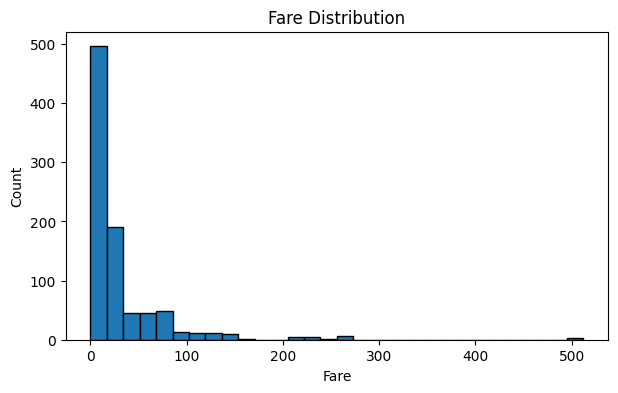

In [14]:
plt.figure(figsize=(7,4))
plt.hist(df['fare'], bins=30, edgecolor='black')
plt.title("Fare Distribution")
plt.xlabel("Fare")
plt.ylabel("Count")
plt.show()


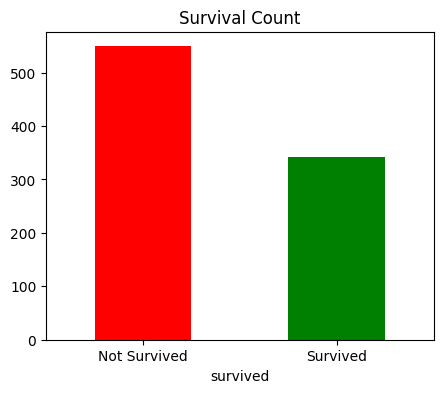

In [22]:
plt.figure(figsize=(5,4))
df['survived'].value_counts().plot(kind='bar', color=['red','green'])
plt.title("Survival Count")
plt.xticks([0,1], ['Not Survived', 'Survived'], rotation=0)
plt.show()


In [23]:
from sklearn.preprocessing import StandardScaler

X = df.drop('survived', axis=1)
y = df['survived']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [24]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

X_pca[:5]


array([[-1.03761866, -0.63084178],
       [ 1.84692588,  1.06006525],
       [-0.54905426, -0.38333981],
       [ 1.53715361,  0.66177103],
       [-1.16713796,  0.36180099]])

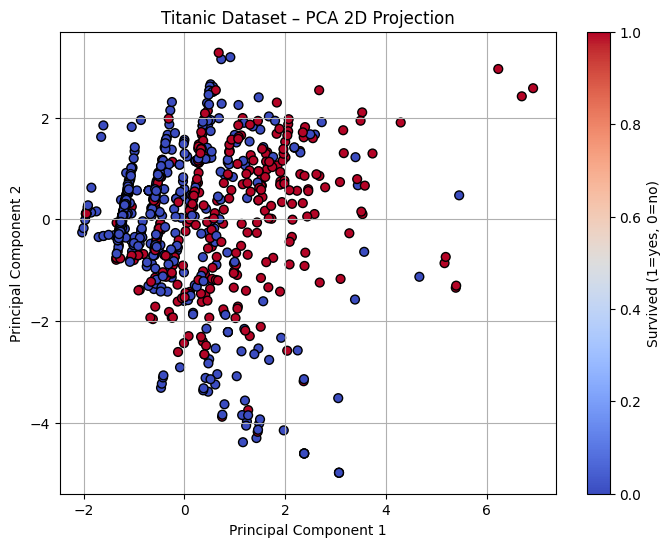

In [33]:
plt.figure(figsize=(8,6))
plt.scatter(
    X_pca[:,0], X_pca[:,1],
    c=y, cmap='coolwarm', s=40, edgecolors='k'
)

plt.title("Titanic Dataset – PCA 2D Projection")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Survived (1=yes, 0=no)')
plt.grid(True)
plt.show()


In [64]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score


In [35]:
# Load dataset
titanic = sns.load_dataset("titanic")

# Select useful columns
df = titanic[['pclass','age','sibsp','parch','fare','sex','embarked']].copy()

# Drop missing values
df['age'].fillna(df['age'].median(), inplace=True)
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

# One-hot encode categoricals
df = pd.get_dummies(df, columns=['sex','embarked'], drop_first=True)

df.head()


,pclass,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S
0,3,22.0,1,0,7.2500,True,False,True
1,1,38.0,1,0,71.2833,False,False,False
2,3,26.0,0,0,7.9250,False,False,True
3,1,35.0,1,0,53.1000,False,False,True
4,3,35.0,0,0,8.0500,True,False,True


In [37]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)


In [38]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)

# Extract cluster labels
clusters = kmeans.labels_

clusters[:10]


array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0], dtype=int32)

In [39]:
df['cluster'] = clusters
df.head()


,pclass,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S,cluster
0,3,22.0,1,0,7.2500,True,False,True,0
1,1,38.0,1,0,71.2833,False,False,False,1
2,3,26.0,0,0,7.9250,False,False,True,0
3,1,35.0,1,0,53.1000,False,False,True,1
4,3,35.0,0,0,8.0500,True,False,True,0


In [40]:
titanic_clean = titanic[['survived']].join(df['cluster'])
titanic_clean.groupby('cluster')['survived'].mean()


cluster
0    0.297045
1    0.608871
Name: survived, dtype: float64

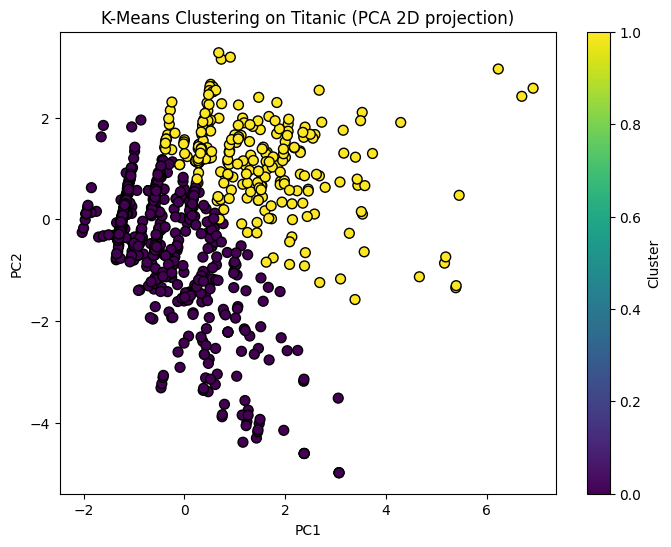

In [41]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(
    X_pca[:,0],
    X_pca[:,1],
    c=clusters,
    cmap='viridis',
    s=50,
    edgecolor='k'
)

plt.title("K-Means Clustering on Titanic (PCA 2D projection)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label='Cluster')
plt.show()


In [42]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)


In [43]:
inertias = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

inertias


[8019.0,
 5951.606702965253,
 4843.090237493035,
 4015.986201645912,
 3595.161163551817,
 3348.6049483470597,
 2908.856998747795,
 2781.748342545647,
 2543.4646655975353,
 2389.007761974793]

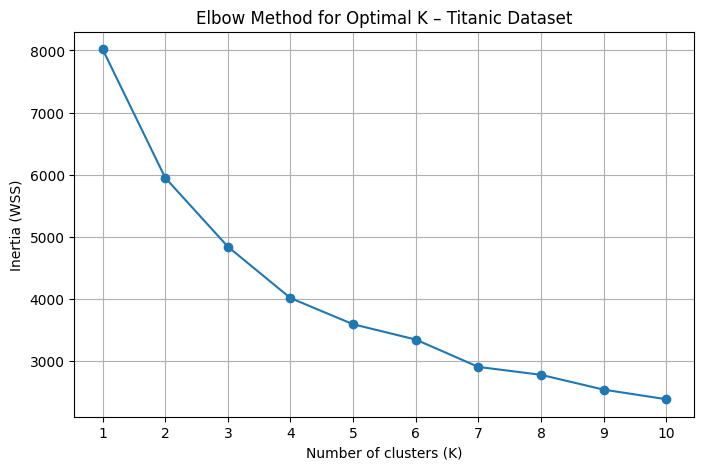

In [50]:
plt.figure(figsize=(8,5))
plt.plot(range(1,11), inertias, marker='o')
plt.xticks(range(1,11))
plt.xlabel("Number of clusters (K)")
plt.ylabel("Inertia (WSS)")
plt.title("Elbow Method for Optimal K – Titanic Dataset")
plt.grid(True)
plt.show()


In [59]:
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

df['cluster'] = clusters


In [60]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

pc1 = X_pca[:, 0]
pc2 = X_pca[:, 1]


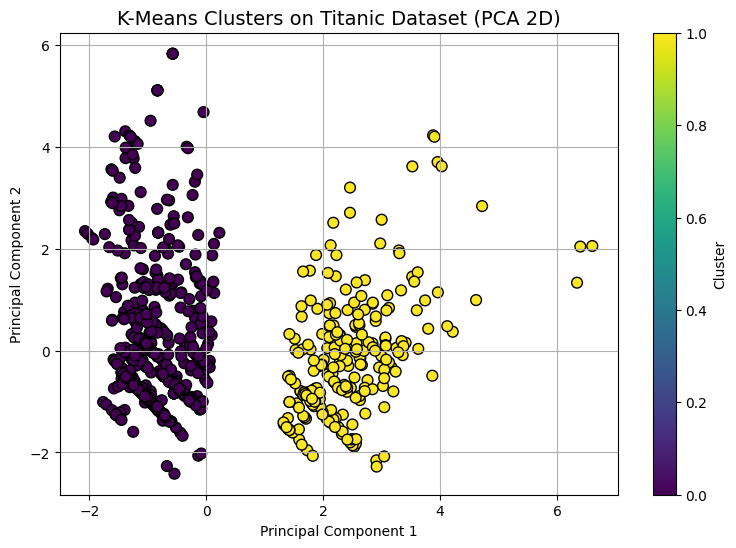

In [61]:
plt.figure(figsize=(9,6))
scatter = plt.scatter(
    pc1, pc2,
    c=clusters,
    cmap='viridis',
    s=60,
    edgecolor='k'
)

plt.title("K-Means Clusters on Titanic Dataset (PCA 2D)", fontsize=14)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)

# Add a colorbar (cluster legend)
plt.colorbar(scatter, label='Cluster')

plt.show()


In [62]:
kmeans = KMeans(n_clusters=2, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)


In [65]:
sil_score = silhouette_score(X_scaled, cluster_labels)
print("Silhouette Score for k=2:", sil_score)


Silhouette Score for k=2: 0.33238298335229854


In [66]:
sil_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    sil_scores.append(score)
    print(f"K={k}: Silhouette Score = {score:.4f}")


K=2: Silhouette Score = 0.3324
K=3: Silhouette Score = 0.3825
K=4: Silhouette Score = 0.3768
K=5: Silhouette Score = 0.3847
K=6: Silhouette Score = 0.3611
K=7: Silhouette Score = 0.3527
K=8: Silhouette Score = 0.3545
K=9: Silhouette Score = 0.3789
K=10: Silhouette Score = 0.3827


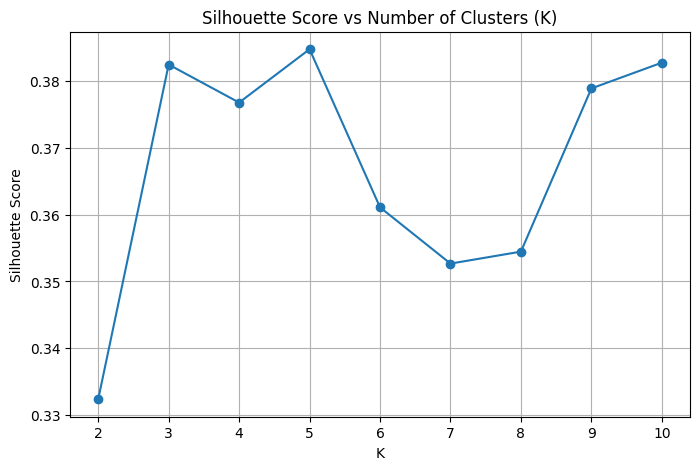

In [67]:
plt.figure(figsize=(8,5))
plt.plot(range(2,11), sil_scores, marker='o')
plt.xticks(range(2,11))
plt.title("Silhouette Score vs Number of Clusters (K)")
plt.xlabel("K")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()
